In [1]:
import pandas
import pylab
# import scipy
# import scipy.stats as stats
import seaborn

import matplotlib.pyplot as pyplot
%matplotlib inline

## Задачи исследования
1. Отличаются ли пелены от бинтов по параметрам?
2. Отличаются ли узкие, средние и широкие бинты друг от друга по параметрам?
3. Каков процент рогожки?
4. Какие группы тканей по качеству получаются?
5. Различаются ли нити основы и нити утка?
6. Какое количество (процент) тканей высокого качества имеют сбалансированное переплетение?
7. Какое количество (процент) тканей среднего качества имеет сбалансированное переплетение?
8. Какое количество (процент) тканей ниского качества имеет сбалансированное переплетение?
9. Каково соотношение сбалансированных тканей и тканей с преобладанием нитей основы?
10. Высчитать "коэффициент заполняемости" тканей
11. Разделить ткани по сбалансированности (сбалансированные - ±3 нити; ткани с преобладанием нитей основы); рассчитать процент каждой группы

In [2]:
def convert_to_float(value):
    """
    Преобразование значений в столбцах датафрейма;
    :param value: float
    :return: float
    """
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value

### Загрузка и предобработка данных

In [3]:
# Загрузка датафрейма из CSV файла;
textiles = pandas.read_csv('dataframe.csv')

########################################################################################################################

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)

########################################################################################################################

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

########################################################################################################################

# Добавление признака density_coefficient;
textiles['density_coefficient'] = round((textiles['warp_dens'] / textiles['weft_dens']), 2)

print()
print()
print("Общее количество записей - " + str(len(textiles)))



Общее количество записей - 304


### Вычисление квартилей

In [4]:
# квартили толщин нитей по основе;
[quartile_thick_warp_1, quartile_thick_warp_2, quartile_thick_warp_3] = textiles['warp_nominal'].quantile([0.25, 0.5, 0.75])
quartile_thick_warp_1 = round(quartile_thick_warp_1, 2)
quartile_thick_warp_2 = round(quartile_thick_warp_2, 2)
quartile_thick_warp_3 = round(quartile_thick_warp_3, 2)

# квартили толщин нитей по утку;
[quartile_thick_weft_1, quartile_thick_weft_2, quartile_thick_weft_3] = textiles['weft_nominal'].quantile([0.25, 0.5, 0.75])
quartile_thick_weft_1 = round(quartile_thick_weft_1, 2)
quartile_thick_weft_2 = round(quartile_thick_weft_2, 2)
quartile_thick_weft_3 = round(quartile_thick_weft_3, 2)

# квартили плотности по основе;
[quartile_dens_warp_1, quartile_dens_warp_2, quartile_dens_warp_3] = textiles['warp_dens'].quantile([0.25, 0.5, 0.75])
quartile_dens_warp_1 = round(quartile_dens_warp_1, 2)
quartile_dens_warp_2 = round(quartile_dens_warp_2, 2)
quartile_dens_warp_3 = round(quartile_dens_warp_3, 2)

# квартили плотности по утку;
[quartile_dens_weft_1, quartile_dens_weft_2, quartile_dens_weft_3] = textiles['weft_dens'].quantile([0.25, 0.5, 0.75])
quartile_dens_weft_1 = round(quartile_dens_weft_1, 2)
quartile_dens_weft_2 = round(quartile_dens_weft_2, 2)
quartile_dens_weft_3 = round(quartile_dens_weft_3, 2)

print()
print()
print("Квартили толщины по основе - " + str(quartile_thick_warp_1) + ' ' + str(quartile_thick_warp_2) + ' ' + str(quartile_thick_warp_3))
print("Квартили толщины по утку - " + str(quartile_thick_weft_1) + ' ' + str(quartile_thick_weft_2) + ' ' + str(quartile_thick_weft_3))
print("Квартили плотности по основе - " + str(quartile_dens_warp_1) + ' ' + str(quartile_dens_warp_2) + ' ' + str(quartile_dens_warp_3))
print("Квартили плотности по утку - " + str(quartile_dens_weft_1) + ' ' + str(quartile_dens_weft_2) + ' ' + str(quartile_dens_weft_3))



Квартили толщины по основе - 0.4 0.45 0.5
Квартили толщины по утку - 0.4 0.5 0.61
Квартили плотности по основе - 14.0 20.0 28.0
Квартили плотности по утку - 8.0 10.0 12.0


### Описание полного набора данных

In [5]:
textiles_warp_thick_mean = round(textiles['warp_nominal'].mean(), 3)
textiles_warp_thick_median = round(textiles['warp_nominal'].median(), 3)
textiles_weft_thick_mean = round(textiles['weft_nominal'].mean(), 3)
textiles_weft_thick_median = round(textiles['weft_nominal'].median(), 3)

print()
print("Толщина по основе - среднее значение - " + str(textiles_warp_thick_mean))
print("Толщина по основе - медиана - " + str(textiles_warp_thick_median))
print("Толщина по утку - среднее значение - " + str(textiles_weft_thick_mean))
print("Толщина по утку - медиана - " + str(textiles_weft_thick_median))

textiles_warp_dens_mean = round(textiles['warp_dens'].mean(), 3)
textiles_warp_dens_median = round(textiles['warp_dens'].median(), 3)
textiles_weft_dens_mean = round(textiles['weft_dens'].mean(), 3)
textiles_weft_dens_median = round(textiles['weft_dens'].median(), 3)

print()
print("Плотность по основе - среднее значение - " + str(textiles_warp_dens_mean))
print("Плотность по основе - медиана - " + str(textiles_warp_dens_median))
print("Плотность по утку - среднее значение - " + str(textiles_weft_dens_mean))
print("Плотность по утку - медиана - " + str(textiles_weft_dens_median))


Толщина по основе - среднее значение - 0.472
Толщина по основе - медиана - 0.45
Толщина по утку - среднее значение - 0.53
Толщина по утку - медиана - 0.5

Плотность по основе - среднее значение - 21.231
Плотность по основе - медиана - 20.0
Плотность по утку - среднее значение - 9.851
Плотность по утку - медиана - 10.0


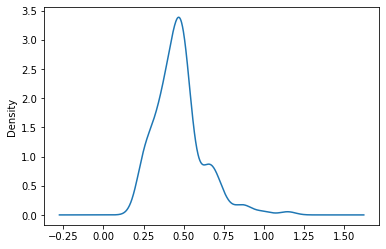

In [6]:
warp_thick = textiles['warp_nominal']
warp_thick.plot.kde()

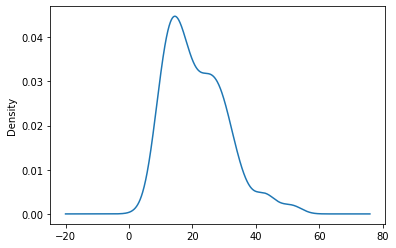

In [7]:
warp_density = textiles['warp_dens']
warp_density.plot.kde()

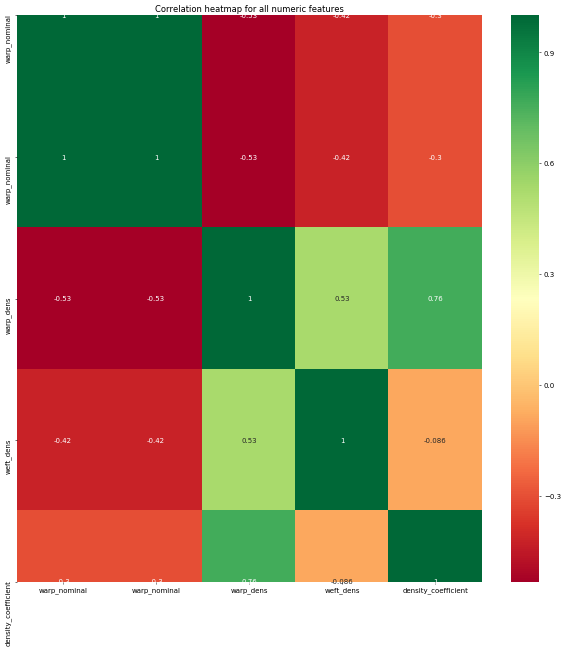

In [8]:
textiles_corr = textiles[['warp_nominal', 'warp_nominal', 'warp_dens', 'weft_dens', 'density_coefficient']]
pyplot.figure(figsize=(15, 15), dpi=50)
seaborn.heatmap(textiles_corr.corr(), xticklabels=textiles_corr.corr().columns, yticklabels=textiles_corr.corr().columns, cmap='RdYlGn', annot=True)
pyplot.xticks(fontsize=10)
pyplot.yticks(fontsize=10)
pyplot.title('Correlation heatmap for all numeric features')
pyplot.show()

### Вычисление "выбросов" в данных

In [9]:
# Выбросы по толщинам нитей;
outliers_thick = textiles[textiles.warp_nominal < (quartile_thick_warp_3 + 1.5 * (quartile_thick_warp_3 + quartile_thick_warp_1))]
outliers_thick = outliers_thick[outliers_thick.warp_nominal > (quartile_thick_warp_1 - 1.5 * (quartile_thick_warp_3 - quartile_thick_warp_1))]
# outliers_thick = outliers_thick[outliers_thick]

print()
print("Величина датафрейма без выбросов по толщине нити - " + str(len(outliers_thick)))

# Выбросы по плотности ткани;
# outliers_dens = textiles[textiles.dens]


Величина датафрейма без выбросов по толщине нити - 278


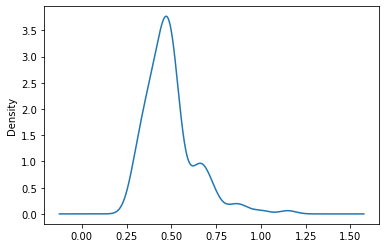

In [10]:
warp_thick_outliers = outliers_thick['warp_nominal']
warp_thick_outliers.plot.kde()

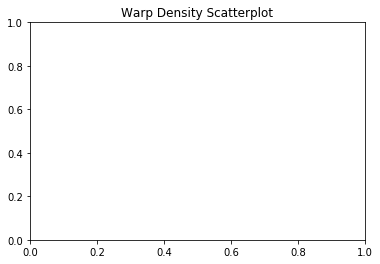

In [11]:
warp_thick_scatter = pyplot.figure()
pyplot.title('Warp Density Scatterplot')
pyplot.show()

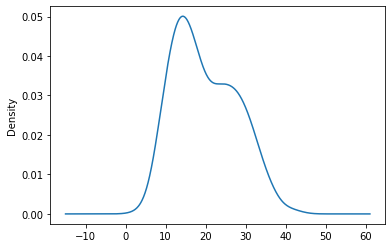

In [12]:
warp_dens_outliers = outliers_thick['warp_dens']
warp_dens_outliers.plot.kde()

### #1 Отличаются ли пелены от бинтов по параметрам? #2 Отличаются ли узкие, средние и широкие бинты

In [13]:
# датафрейм - только узкие бинты;
narrow_bands = textiles[textiles['type'] == 'n_band']
# датафрейм - только средние бинты;
middle_bands = textiles[textiles['type'] == 'm_band']
# датафрейм - только широкие бинты;
wide_bands = textiles[textiles['type'] == 'w_band']

# датафрейм - бинты всех типов;
bands = pandas.concat([narrow_bands, middle_bands, wide_bands])

print()
print("Узких бинтов - " + str(len(narrow_bands)))
print("Средних бинтов - " + str(len(middle_bands)))
print("Широких бинтов - " + str(len(wide_bands)))
print("Всего бинтов - " + str(len(bands)))
print()

# процент узких бинтов - от общего количества тканей;
narrow_bands_percent_textiles = round((len(narrow_bands) / len(textiles)) * 100, 2)
# процент средних ьинтов - от общего количества тканей;
middle_bands_percent_textiles = round((len(middle_bands) / len(textiles)) * 100, 2)
# процент широких бинтов - от общего количества тканей;
wide_bands_percent_textiles = round((len(wide_bands) / len(textiles)) * 100, 2)
# процент всех бинтов - от общего количества тканей;
bands_percent = round((len(bands) / len(textiles)) * 100, 2)

narrow_bands_percent_bands = round((len(narrow_bands) / len(bands)) * 100, 2)
middle_bands_percent_bands = round((len(middle_bands) / len(bands)) * 100, 2)
wide_bands_percent_bands = round((len(wide_bands) / len(bands)) * 100, 2)

print("Процент узких бинтов (от общего количества тканей) - " + str(narrow_bands_percent_textiles))
print("Процент средних бинтов (от общего количества тканей) - " + str(middle_bands_percent_textiles))
print("Процент широких бинтов ( от общего количества тканей) - " + str(wide_bands_percent_textiles))

print()
print("Процент узких бинтов (от общего количества бинтов) - " + str(narrow_bands_percent_bands))
print("Процент средних бинтов (от общего количества бинтов) - " + str(middle_bands_percent_bands))
print("Процент щироких бинтов (от общего количества бинтов) - " + str(wide_bands_percent_bands))

print()
print("Процент бинтов (от общего количества тканей) - " + str(bands_percent))

nbands_warp_thick_mean = round(narrow_bands['warp_nominal'].mean(), 3)
nbands_warp_thick_median = round(narrow_bands['warp_nominal'].median(), 3)
nbands_weft_thick_mean = round(narrow_bands['weft_nominal'].mean(), 3)
nbands_weft_thick_median = round(narrow_bands['weft_nominal'].median(), 3)
nbands_warp_dens_mean = round(narrow_bands['warp_dens'].mean(), 3)
nbands_warp_dens_median = round(narrow_bands['warp_dens'].median(), 3)
nbands_weft_dens_mean = round(narrow_bands['weft_dens'].mean(), 3)
nbands_weft_dens_median = round(narrow_bands['weft_dens'].median(), 3)

print()
print("Узкие бинты:")
print("Толщина по основе - среднее значение - " + str(nbands_warp_thick_mean))
print('Толщина по основе - медиана - ' + str(nbands_warp_thick_median))
print("Толщина по утку - среднее значение - " + str(nbands_weft_thick_mean))
print("Толщина по утку - медиана - " + str(nbands_weft_thick_median))
print()
print("Плотность по основе - среднее значение - " + str(nbands_warp_dens_mean))
print("Плотность по основе - медиана - " + str(nbands_warp_dens_median))
print("Плотность по утку - среднее значение - " + str(nbands_weft_dens_mean))
print("Плотность по утку - медиана - " + str(nbands_weft_dens_median))

mbands_warp_thick_mean = round(middle_bands['warp_nominal'].mean(), 3)
mbands_warp_thick_median = round(middle_bands['warp_nominal'].median(), 3)
mbands_weft_thick_mean = round(middle_bands['weft_nominal'].mean(), 3)
mbands_weft_thick_median = round(middle_bands['weft_nominal'].median(), 3)
mbands_warp_dens_mean = round(middle_bands['warp_dens'].mean(), 3)
mbands_warp_dens_median = round(middle_bands['warp_dens'].median(), 3)
mbands_weft_dens_mean = round(middle_bands['weft_dens'].mean(), 3)
mbands_weft_dens_median = round(middle_bands['weft_dens'].median(), 3)

print()
print("Средние бинты:")
print("Толщина по основе - среднее значение - " + str(mbands_warp_thick_mean))
print("Толщина по основе - медиана - " + str(mbands_warp_thick_median))
print("Толщина по утку - среднее значение - " + str(mbands_weft_thick_mean))
print("Толщина по утку - медиана - " + str(mbands_weft_thick_median))
print()
print("Плотность по основе - среднее значение - " + str(mbands_warp_dens_mean))
print("Плотность по основе - медиана - " + str(mbands_warp_dens_median))
print("Плотность по утку - среднее значение - " + str(mbands_weft_dens_mean))
print("Плотность по утку - медиана - " + str(mbands_weft_dens_median))

wbands_warp_thick_mean = round(wide_bands['warp_nominal'].mean(), 3)
wbands_warp_thick_median = round(wide_bands['warp_nominal'].median(), 3)
wbands_weft_thick_mean = round(wide_bands['weft_nominal'].mean(), 3)
wbands_weft_thick_median = round(wide_bands['weft_nominal'].median(), 3)
wbands_warp_dens_mean = round(wide_bands['warp_dens'].mean(), 3)
wbands_warp_dens_median = round(wide_bands['warp_dens'].median(), 3)
wbands_weft_dens_mean = round(wide_bands['weft_dens'].mean(), 3)
wbands_weft_dens_median = round(wide_bands['weft_dens'].median(), 3)

print()
print("Широкие бинты:")
print("Толщина по основе - среднее значение - " + str(wbands_warp_thick_mean))
print("Толщина по основе - медиана - " + str(wbands_warp_thick_median))
print("Толщина по утку - среднее значение - " + str(wbands_weft_thick_mean))
print("Толщина по утку - медиана - " + str(wbands_weft_thick_median))
print()
print("Плотность по основе - среднее значение - " + str(wbands_warp_dens_mean))
print("Плотность по основе - медиана - " + str(wbands_warp_dens_median))
print("Плотность по утку - среднее значение - " + str(wbands_weft_dens_mean))
print("Плотность по утку - медиана - " + str(wbands_weft_dens_median))


Узких бинтов - 94
Средних бинтов - 81
Широких бинтов - 19
Всего бинтов - 194

Процент узких бинтов (от общего количества тканей) - 30.92
Процент средних бинтов (от общего количества тканей) - 26.64
Процент широких бинтов ( от общего количества тканей) - 6.25

Процент узких бинтов (от общего количества бинтов) - 48.45
Процент средних бинтов (от общего количества бинтов) - 41.75
Процент щироких бинтов (от общего количества бинтов) - 9.79

Процент бинтов (от общего количества тканей) - 63.82

Узкие бинты:
Толщина по основе - среднее значение - 0.472
Толщина по основе - медиана - 0.45
Толщина по утку - среднее значение - 0.493
Толщина по утку - медиана - 0.5

Плотность по основе - среднее значение - 22.532
Плотность по основе - медиана - 22.0
Плотность по утку - среднее значение - 9.617
Плотность по утку - медиана - 9.0

Средние бинты:
Толщина по основе - среднее значение - 0.479
Толщина по основе - медиана - 0.45
Толщина по утку - среднее значение - 0.539
Толщина по утку - медиана - 0.5


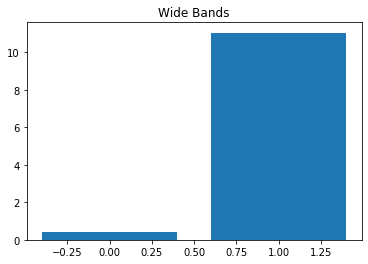

In [14]:
wbands_figure, axis = pyplot.subplots()
axis.bar([0, 1], [wbands_weft_thick_mean, wbands_weft_dens_mean])
pyplot.title('Wide Bands')
pyplot.show()

### #3 Каков процент рогожки?

### #5 Различаются ли нити основы и нити утка?

### #11 Разделить ткани по сбалансированности (сбалансированные - ±3 нити; ткани с преобладанием нитей основы); рассчитать процент каждой группы

In [15]:
balanced = textiles.query("(warp_dens <= (weft_dens + 3)) & (warp_dens >= (weft_dens - 3))")
unbalanced = textiles

print(len(balanced))
print(len(unbalanced))

balanced_percent = len(balanced) / len(textiles) * 100
print(str(balanced_percent))

47
304
15.460526315789474
